In [84]:
import pandas as pd
import numpy as np
import seaborn as sns

In [85]:
## STEP 1 Understand Data & Make Hypothesis
# using predictors of Athletes and Prev Medals to predict medals won
teams = pd.read_csv(r"C:\Users\emmap\OneDrive\Documents\Datasets\teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [86]:
# drop uneeded columns
teams = teams[['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals']]
teams = teams.rename(columns={'age':'avg_age'})
teams

,team,country,year,athletes,avg_age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [87]:
# understand correlations; want strong correlations between
# predictor values and target variable
teams.drop(['team', 'country'], axis=1).corr()['medals']
# high correlation with Athletes and Prev_Medals in particular

year          -0.021603
athletes       0.840817
avg_age        0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

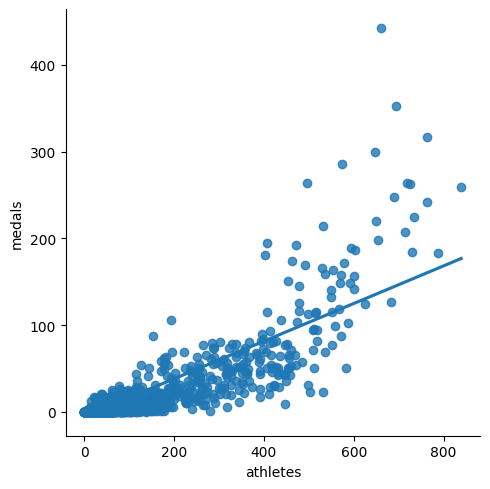

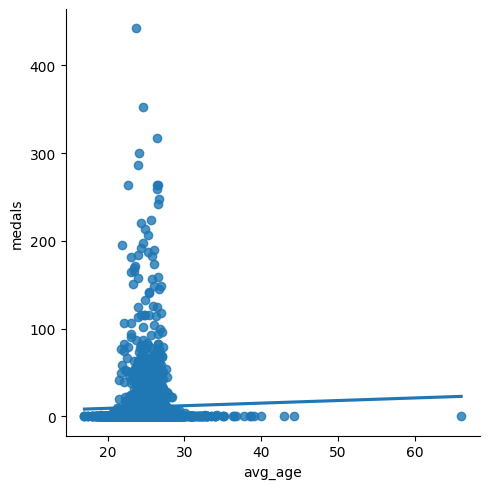

In [88]:
# explore plots to find relationships between columns

sns.lmplot(x='athletes', y='medals', data=teams, fit_reg=True, ci=None)
# rough linear relationship between Athletes and Medals 
sns.lmplot(x='avg_age', y='medals', data=teams, fit_reg=True, ci=None)
# very weak correlation; perhaps non linear relationship 
# higher medals won with avg_age is 20-30

<Axes: ylabel='Frequency'>

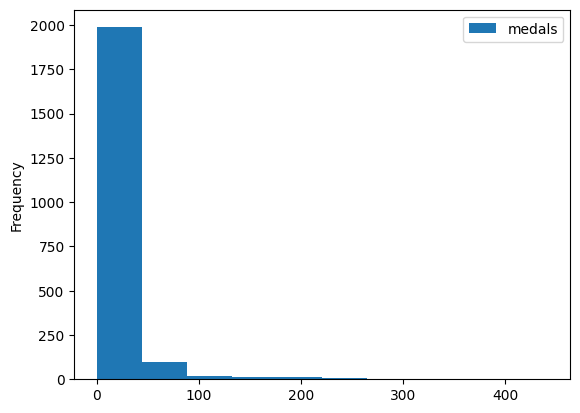

In [89]:
# histogram
teams.plot.hist(y='medals')

In [90]:
## STEP 2 Clean Data
# drop null values
teams[teams.isnull().any(axis=1)]
teams = teams.dropna()

In [91]:
# STEP 3 Split Data
train = teams[teams['year'] < 2012].copy()
test = teams[teams['year'] >= 2012].copy()
test.shape
train.shape
# gives around 80-20 split

(1609, 7)

In [92]:
# STEP 4 Train Model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [93]:
predictors = ['athletes', 'prev_medals']
target = 'medals'

In [94]:
# fit the model
reg.fit(train[predictors], train['medals'])
LinearRegression()

LinearRegression()

In [95]:
predictions = reg.predict(test[predictors])
predictions
# gives numpy array; round and avoid neg numbers
# must rescale

array([-9.61221245e-01, -1.17633261e+00, -1.42503158e+00, -1.71184673e+00,
        2.15562926e+00,  3.91463636e+00, -1.71184673e+00, -1.85525431e+00,
        3.67563128e-01, -2.77770967e-01, -1.85525431e+00, -1.49673537e+00,
        4.67519911e+01,  2.87550937e+01,  4.58450091e+00,  2.54773581e+00,
       -1.85525431e+00, -1.64014295e+00, -1.85525431e+00, -1.85525431e+00,
        1.46556876e+02,  1.20571799e+02,  6.56314795e+00,  3.95275254e+00,
        7.34283247e+00,  1.03117468e+01,  5.19171882e+00,  3.58517645e+00,
       -1.64014295e+00, -1.64014295e+00, -1.56843916e+00, -1.20992022e+00,
       -1.71184673e+00, -1.42503158e+00,  1.17929959e+01,  1.00049298e+01,
       -1.78355052e+00, -1.71184673e+00, -1.56843916e+00, -1.56843916e+00,
       -1.99866189e+00, -1.99866189e+00, -1.56843916e+00, -1.35332779e+00,
       -1.92695810e+00, -1.92695810e+00,  3.28912706e+01,  2.53042547e+01,
       -1.78355052e+00, -1.28162400e+00, -1.85525431e+00, -3.87590939e-01,
        7.83480779e+01,  

In [96]:
# STEP 5 Make Predictions
test['predictions'] = predictions
test

,team,country,year,athletes,avg_age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [97]:
test.loc[test['predictions'] < 0, 'predictions'] = 0

In [98]:
test['predictions'] = test['predictions'].round()
test
# values make sense now

,team,country,year,athletes,avg_age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [99]:
# STEP 6 Evaluate & Improve
# Finding Mean Absolute Error
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test['medals'], test['predictions'])
error
# measures error; investigate if this is good error or not
# on average, predictions were within 3.3 medals of actual medals won

3.2987654320987656

In [100]:
teams.describe()['medals']
# error is below SD

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [101]:
# look at predictions for a certain country
test[test['team'] == 'USA']
# predictions are decent
test[test['country'] == 'France']

,team,country,year,athletes,avg_age,prev_medals,medals,predictions
679,FRA,France,2012,426,26.6,77.0,82,86.0
680,FRA,France,2016,512,27.1,82.0,96,96.0


In [102]:
errors = (test['medals'] - test['predictions']).abs()
errors
# gives errors by row, may then group by team

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [103]:
errors_by_team = errors.groupby(test['team']).mean()
errors_by_team
# gives how many medals we were off by fpr each country

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [ ]:
# STEP 7 Next Steps
# may add in more predictors
# may try different models like Random Forest
# consider non linear relationships between variables